### Plotting alignment data

In [1]:
%matplotlib inline
import pandas as pd
import utils.db_utils as db
import utils.plot_utils as plot
from config import getConfig

############################################
# get configuration
cfg = getConfig() # configure values in config.js
############################################

targetBibleType = cfg['targetBibleType']
origLangPathGreek =  cfg['origLangPathGreek']
origLangPathHebrew = cfg['origLangPathHebrew']
targetLanguagePath = cfg['targetLanguagePath']
dbPath = cfg['dbPath']
testamentStr = cfg['testamentStr']
baseDataPath = cfg['baseDataPath']

targetLang = 'en'

connections = db.initAlignmentDB(dbPath)
connection = db.getConnectionForTable(connections, 'default')
connection_owi = db.getConnectionForTable(connections, db.original_words_index_table)

Connection to SQLite DB successful
Connection to SQLite DB successful


In [15]:
# find all alignments for this lemma
def findAlignmentsForWord(connection_owi, word, minAlignments, searchLemma=False, maxRows=None):
    alignmentsByWord = db.findAlignmentsFromIndexDbForOrigWord(connection_owi, word, searchLemma, maxRows)
    alignmentsList, rejectedAlignmentsList = db.filterAlignments(alignmentsByWord, minAlignments)
    return pd.DataFrame(alignmentsList)

# word = 'θεός'
# word = 'καί' # Found 8995
# word = 'ὁ' # Found 20377
word = 'αὐτός' # Found 5573

minAlignments = 0
lemmaAlignments = findAlignmentsForWord(connection_owi, word, minAlignments, searchLemma=True)
print(f"Found {len(lemmaAlignments)} alignments")

Found 5573 alignments


In [16]:
# find all alignments for this original word

# word = 'Θεός' # found 69
# word = 'Θεὸς' # found 239
# word = 'Θεοῦ'  # found 712
# word = 'καί' # Found 32
# word = 'καὶ' #Found 8961
# word = 'τὸ' # Found 1715
word = 'αὐτοῦ' # Found 1415

origAlignments = findAlignmentsForWord(connection_owi, word, minAlignments, searchLemma = False)
print(f"Found {len(origAlignments)} alignments")

Found 1415 alignments


In [17]:
db.describeAlignments(origAlignments)

Alignments description:
       alignment_key  origWordsCount  origWordsBetween  targetWordsCount  \
count    1415.000000     1415.000000       1415.000000       1415.000000   
mean    56414.004240        1.031802          0.001413          1.067845   
std     40746.154226        0.254477          0.053168          0.300267   
min        21.000000        1.000000          0.000000          1.000000   
25%     21498.500000        1.000000          0.000000          1.000000   
50%     47073.000000        1.000000          0.000000          1.000000   
75%     94699.000000        1.000000          0.000000          1.000000   
max    130397.000000        5.000000          2.000000          4.000000   

       targetWordsBetween  alignmentTxtFrequency  alignmentsTotal  \
count              1415.0            1415.000000           1415.0   
mean                  0.0              47.762914           1415.0   
std                   0.0              28.531895              0.0   
min            

{'desc': {'alignment_key': {'count': 1415.0,
   'mean': 56414.00424028269,
   'std': 40746.154226438084,
   'min': 21.0,
   '25%': 21498.5,
   '50%': 47073.0,
   '75%': 94699.0,
   'max': 130397.0},
  'origWordsCount': {'count': 1415.0,
   'mean': 1.0318021201413428,
   'std': 0.2544774502722347,
   'min': 1.0,
   '25%': 1.0,
   '50%': 1.0,
   '75%': 1.0,
   'max': 5.0},
  'origWordsBetween': {'count': 1415.0,
   'mean': 0.0014134275618374558,
   'std': 0.05316817773513506,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 0.0,
   'max': 2.0},
  'targetWordsCount': {'count': 1415.0,
   'mean': 1.0678445229681979,
   'std': 0.300267355874017,
   'min': 1.0,
   '25%': 1.0,
   '50%': 1.0,
   '75%': 1.0,
   'max': 4.0},
  'targetWordsBetween': {'count': 1415.0,
   'mean': 0.0,
   'std': 0.0,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 0.0,
   'max': 0.0},
  'alignmentTxtFrequency': {'count': 1415.0,
   'mean': 47.76291375844373,
   'std': 28.53189477994025,
   'min': 0.0706

### Analysis of alignments for Θεοῦ in the en_ult:

#### Frequency of alignments:

In [18]:
frequency = origAlignments['alignmentText'].value_counts()
print(frequency)

αὐτοῦ = his                                    954
αὐτοῦ = him                                    203
αὐτοῦ = he                                      51
αὐτοῦ = its                                     27
αὐτοῦ = His                                     27
                                              ... 
τὴν αἰώνιον αὐτοῦ δόξαν = his eternal glory      1
αὐτοῦ = over it                                  1
αὐτοῦ = himself                                  1
αὐτοῦ = with him                                 1
αὐτοῦ = beast s                                  1
Name: alignmentText, Length: 79, dtype: int64


##### Notes:
- the left column is the specific alignment, and the right column is the number of times that specific alignment has been made so far in the NT.
- alignments that contain more words are more suspect.
- in future will combine "God s" to "God's" before doing analysis
<p></p>

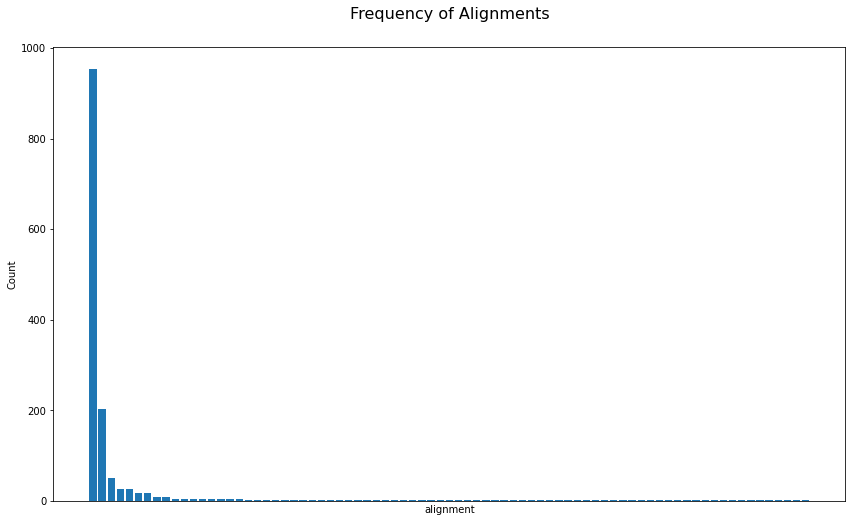

In [19]:
plot.plotFieldFrequency(frequency, "", 'alignment', title="Frequency of Alignments", xNumbers=False, xShowTicks=False)

### Analysis:

#### Analysis of numerical metrics:

In [20]:
descr = origAlignments.describe()
print(f"Alignments description:\n{descr}")

Alignments description:
       alignment_key  origWordsCount  origWordsBetween  targetWordsCount  \
count    1415.000000     1415.000000       1415.000000       1415.000000   
mean    56414.004240        1.031802          0.001413          1.067845   
std     40746.154226        0.254477          0.053168          0.300267   
min        21.000000        1.000000          0.000000          1.000000   
25%     21498.500000        1.000000          0.000000          1.000000   
50%     47073.000000        1.000000          0.000000          1.000000   
75%     94699.000000        1.000000          0.000000          1.000000   
max    130397.000000        5.000000          2.000000          4.000000   

       targetWordsBetween  alignmentTxtFrequency  alignmentsTotal  \
count              1415.0            1415.000000           1415.0   
mean                  0.0              47.762914           1415.0   
std                   0.0              28.531895              0.0   
min            

#### Analysis of original language word count:

In [21]:
field = 'origWordsCount'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")


Frequency of origWordsCount:
1    1388
2      14
3       9
4       3
5       1
Name: origWordsCount, dtype: int64


##### Notes:
- this field analysis suggests for θεός nearly all the original language word counts are tight. The word counts of 3 may need review. So we could probaby use that as a threshold for to flag for review.
<p></p>

#### Analysis of target language word count:

In [22]:
field = 'targetWordsCount'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")


Frequency of targetWordsCount:
1    1334
2      70
3       7
4       4
Name: targetWordsCount, dtype: int64


##### Notes:
- this field analysis suggests that for θεός likely all the target language word counts are tight. The word count of 3 probably good for English (`of a god`). But still we could probaby use that as a threshold for to flag for review.
<p></p>

#### Analysis of count of extra unaligned words between aligned original language words:


Frequency of origWordsBetween:
0    1414
2       1
Name: origWordsBetween, dtype: int64


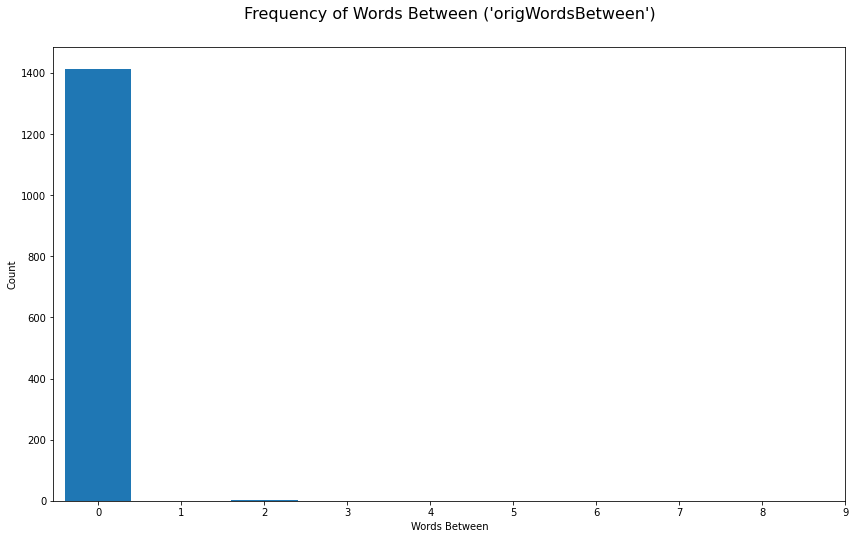

In [23]:
field = 'origWordsBetween'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")
plot.plotFieldFrequency(field_frequency, field, f"Words Between", max=10)

##### Notes:
- this field analysis suggests that most original language alignments probably good. Probably the cases of a word between (count > 0) aligned words should be reviewed.
<p></p>

#### Analysis of count of extra unaligned words between aligned target language words:


Frequency of targetWordsBetween:
0    1415
Name: targetWordsBetween, dtype: int64


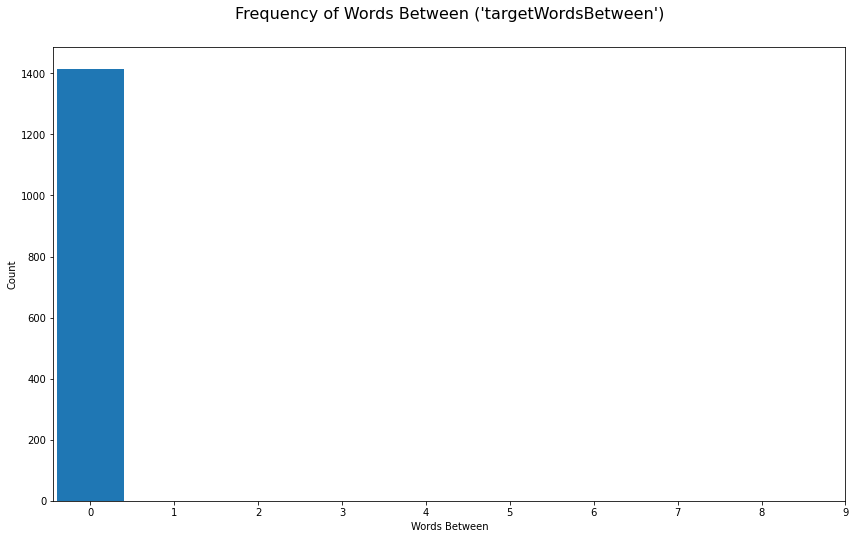

In [24]:
field = 'targetWordsBetween'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")
plot.plotFieldFrequency(field_frequency, field, f"Words Between", max=10)

##### Notes:
- this field analysis suggests that most target language alignments probably good. Large gaps between aligned words are likely due to wordmap suggesting wrong occurence of a word and the user selecting. Probably the cases of a word between (count > 0) aligned words should be reviewed.
<p></p>